# SALARY HIKE ANALYSIS

In [44]:
# importing the packages--
import pandas as pd
import numpy as np
import math as m
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [4]:
# reading the data file--
def read_data():
    data=pd.read_csv("C:/ANKITA/ASSIGNMENTS/Day 21 - 14th May/Simple Linear Regression/Assignment 2/Salary_Data.csv")
    return data

In [5]:
# calling the function--
data= read_data()
print(data.head())

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


In [6]:
# renaming the columns--
data=data.rename({'YearsExperience':'yrs_exp','Salary':'salary'},axis=1)
print(data.head(5))

   yrs_exp   salary
0      1.1  39343.0
1      1.3  46205.0
2      1.5  37731.0
3      2.0  43525.0
4      2.2  39891.0


In [7]:
# checking the missing values--
data.isnull().sum()

yrs_exp    0
salary     0
dtype: int64

In [8]:
# printing the basic info about data--
print(data.columns)
print("Data types---")
print("==========================")
print(data.dtypes)
print("==========================")
print("Info---")
print(data.info())
print("==========================")
print("Average salary---")
print(int(data["salary"].mean()))
print("Minimum salary---")
print(int(data["salary"].min()))
print("Maximum salary---")
print(int(data["salary"].max()))

Index(['yrs_exp', 'salary'], dtype='object')
Data types---
yrs_exp    float64
salary     float64
dtype: object
Info---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   yrs_exp  30 non-null     float64
 1   salary   30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes
None
Average salary---
76003
Minimum salary---
37731
Maximum salary---
122391


In [9]:
data["salary"]=data["salary"].astype("int")
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   yrs_exp  30 non-null     float64
 1   salary   30 non-null     int32  
dtypes: float64(1), int32(1)
memory usage: 488.0 bytes


# Exploratory Data Analysis

Axes(0.125,0.11;0.775x0.77)


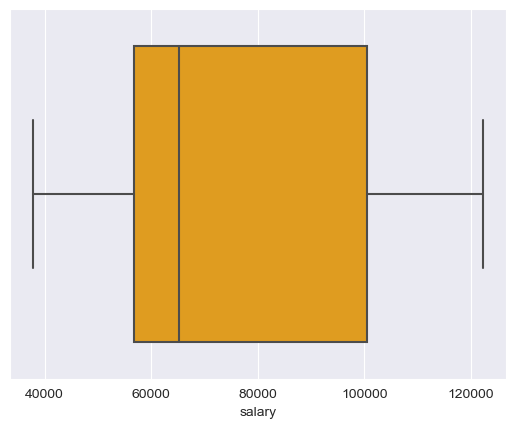

In [17]:
# checking the outliers--
print(sns.boxplot(x=data["salary"],color="orange"))

Axes(0.125,0.11;0.775x0.77)


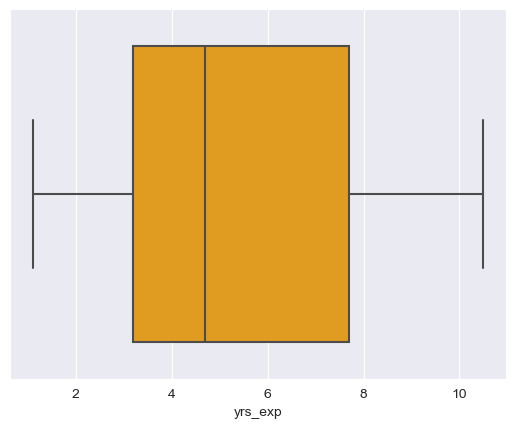

In [18]:
print(sns.boxplot(x=data["yrs_exp"],color="orange"))

0.35411967922959153


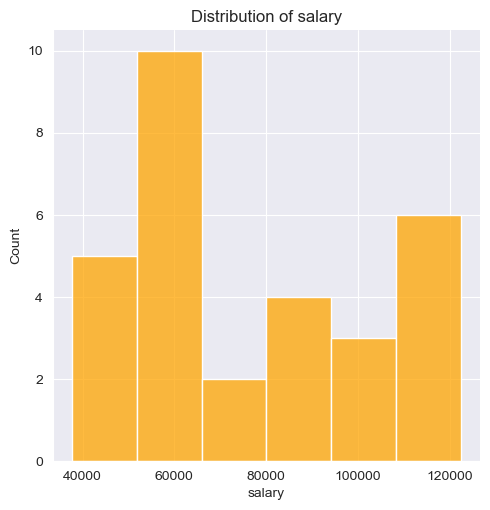

In [19]:
# distribution of salary--
sns.displot(x=data["salary"],color="orange")
plt.title("Distribution of salary")
print(data["salary"].skew())

<Axes: xlabel='yrs_exp', ylabel='salary'>

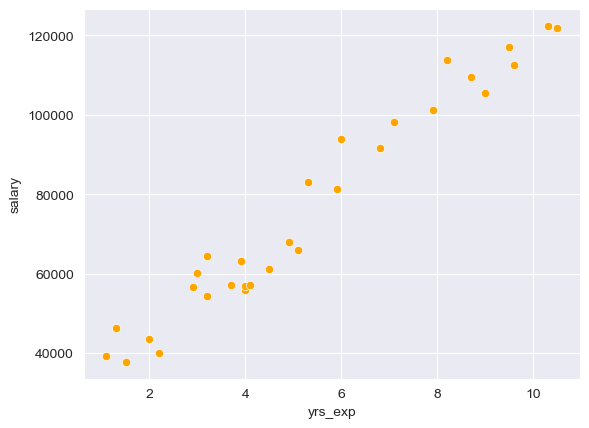

In [20]:
sns.scatterplot(x="yrs_exp",y="salary",data=data,color="orange")

<Axes: xlabel='yrs_exp', ylabel='salary'>

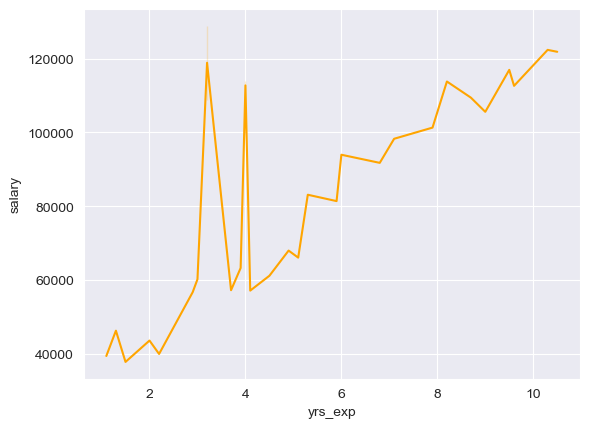

In [21]:
sns.lineplot(x="yrs_exp",y="salary",data=data,estimator="sum",color="orange")

<Axes: xlabel='yrs_exp', ylabel='salary'>

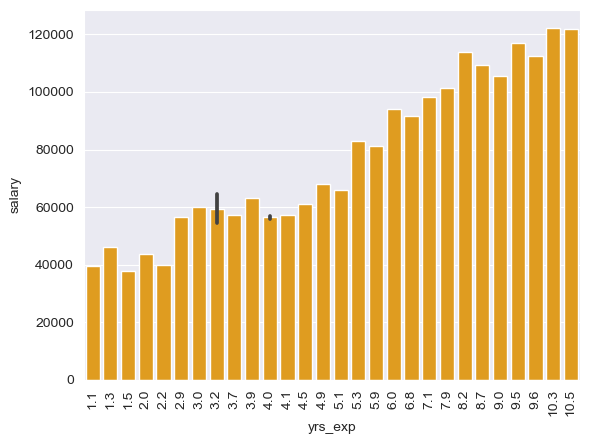

In [16]:
plt.xticks(rotation=90,fontsize="medium")
sns.barplot(x="yrs_exp",y="salary",data=data,color="orange")

<Axes: xlabel='yrs_exp', ylabel='salary'>

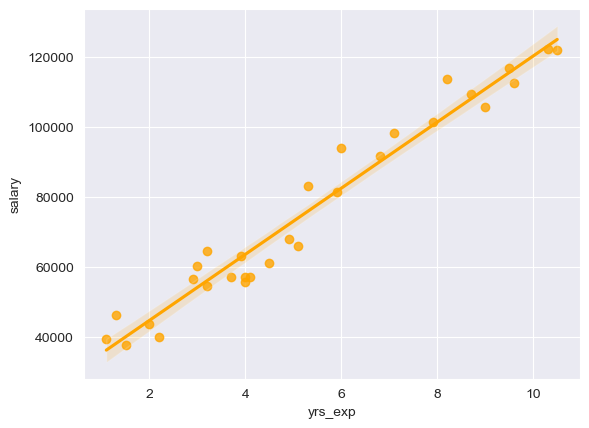

In [22]:
sns.regplot(x="yrs_exp",y="salary",data=data,color="orange")

<Axes: >

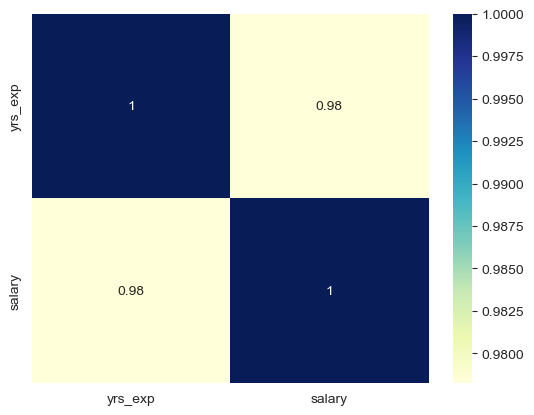

In [37]:
sns.heatmap(data.corr(),annot=True,cmap="YlGnBu")

# Linear Regression

### Prediction Model of Salary Hike

In [38]:
# creating the dataframe--
df=data
print(df.head())

   yrs_exp  salary
0      1.1   39343
1      1.3   46205
2      1.5   37731
3      2.0   43525
4      2.2   39891


In [39]:
df.shape

(30, 2)

In [40]:
# sampling of data--
training,testing=train_test_split(df,test_size=0.2)

In [41]:
print(training.head())
training.shape

    yrs_exp  salary
3       2.0   43525
20      6.8   91738
27      9.6  112635
14      4.5   61111
24      8.7  109431


(24, 2)

In [42]:
print(testing.head())
testing.shape

    yrs_exp  salary
6       3.0   60150
22      7.9  101302
16      5.1   66029
26      9.5  116969
5       2.9   56642


(6, 2)

In [43]:
# defining--
X=training["yrs_exp"]
y=training["salary"]
X=X.values.reshape(-1,1)
y=y.values.reshape(-1,1)

In [45]:
# creating the object of linear regression model--
model=LinearRegression()
print(model)

LinearRegression()


In [46]:
train_model=model.fit(X,y)
print("Model training is completed")
print(train_model)

Model training is completed
LinearRegression()


In [56]:
print(model.coef_)         ### this is m value
print(model.intercept_)    ### this is b value
                           ### y = mx + b

[[9596.60245245]]
[24710.6808928]


In [58]:
x=2.0
y=round((model.coef_[0][0])*x + model.intercept_[0])
print("Salary with {} yrs of experience is {}.".format(x,y))

Salary with 2.0 yrs of experience is 43904.


In [49]:
X_test=testing["yrs_exp"].values.reshape(-1,1)
X_test

array([[3. ],
       [7.9],
       [5.1],
       [9.5],
       [2.9],
       [1.1]])

In [50]:
pred_salary=train_model.predict(X_test)
pred_salary

array([[ 53500.48825014],
       [100523.84026713],
       [ 73653.35340028],
       [115878.40419104],
       [ 52540.82800489],
       [ 35266.94359049]])

In [51]:
testing["pred_salary"]=pred_salary
testing

,yrs_exp,salary,pred_salary
6,3.0,60150,53500.488250
22,7.9,101302,100523.840267
16,5.1,66029,73653.353400
26,9.5,116969,115878.404191
5,2.9,56642,52540.828005
0,1.1,39343,35266.943590


In [52]:
testing["error"]=testing["salary"]-testing["pred_salary"]
testing

,yrs_exp,salary,pred_salary,error
6,3.0,60150,53500.488250,6649.511750
22,7.9,101302,100523.840267,778.159733
16,5.1,66029,73653.353400,-7624.353400
26,9.5,116969,115878.404191,1090.595809
5,2.9,56642,52540.828005,4101.171995
0,1.1,39343,35266.943590,4076.056410


In [53]:
round(r2_score(testing["salary"],testing["pred_salary"])*100,2)

96.84

<Axes: xlabel='yrs_exp', ylabel='salary'>

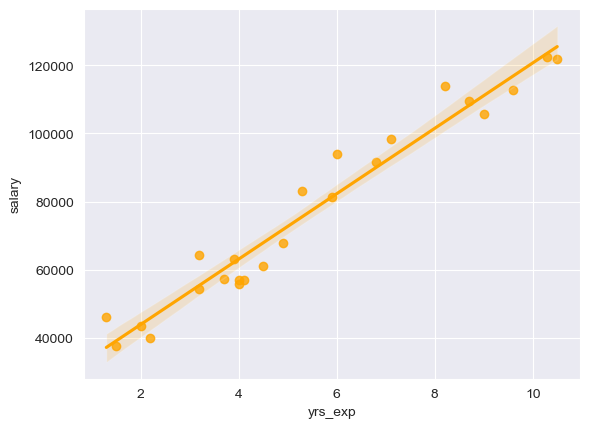

In [54]:
sns.regplot(x="yrs_exp",y="salary",data=training,color="orange")

<Axes: xlabel='yrs_exp', ylabel='pred_salary'>

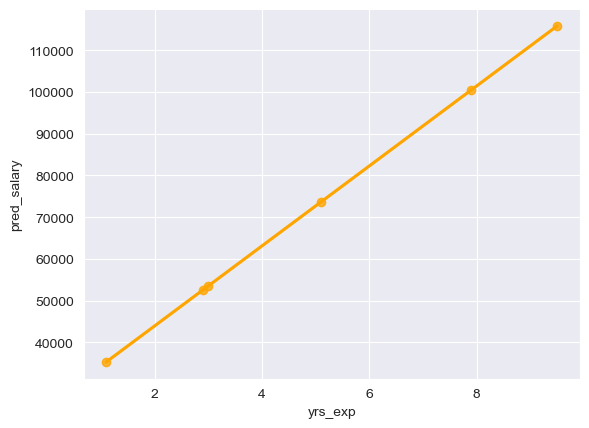

In [55]:
sns.regplot(x="yrs_exp",y="pred_salary",data=testing,color="orange")